## Let's understand loss functions

Let's try to understand the full Cross-Entropy Loss function:

$L_{CE} = -\frac{1}{n}\sum^n_{i=1}Y_i \cdot \log{\hat{Y}_i} - (1-Y_i) \cdot \log(1-\hat{Y}_i)$

(images: courtesy [Vladimir Haltakov](https://twitter.com/haltakov/status/1448353272373432322))

### Binary loss classification 
If we have a dataset of images of apples and not-apples, we can label the apple images as y=1 and the rest as y=0. The classifier with output a probability (using a softmax function as the last layer) of whether the image is of an apple or not (ex. $\hat{Y}=0.9$)

<img src="images/00_binary_loss.png" alt="Binary Loss" style="width: 600px;"/>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [88]:
predictions = np.arange(0.01, 1, 0.01)
log_predictions = np.log(predictions)
data = pd.DataFrame({'x': np.arange(0.01,1.01,0.01)})
data['log'] = np.log(data['x'])

[(-5, 0)]

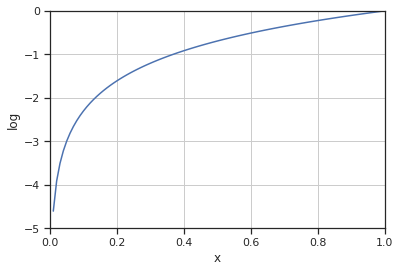

In [94]:
h = sns.lineplot(data=data, x='x', y='log')
sns.set_style("ticks",{'axes.grid' : True})
h.set(xlim=(0,1))
h.set(ylim=(-5,0))

## Full equation


<img src="images/00_binary_loss_full_eqn3.png" alt="Binary Loss" style="width: 600px;"/>

In [95]:
def binary_cross_entropy_loss(target, predicted):
    loss = 0
    
    for i, y in enumerate(target):
        y_hat = predicted[i]
        loss += y*np.log(y_hat) + (1-y)*np.log(1-y_hat)
        
    return -loss/len(target)

In [3]:
data = {
    'target': [1, 0, 0, 1],
    'predicted_good': [0.9, 0.1, 0.2, 0.8],
    'predicted_bad': [0.6, 0.7, 0.8, 0.1]
}

In [100]:
print("BCE loss (good)", binary_cross_entropy_loss(data['target'], data['predicted_good']))
print("BCE loss (bad)", binary_cross_entropy_loss(data['target'], data['predicted_bad']))

BCE loss (good) 0.164252033486
BCE loss (bad) 1.40670535838


## Kaggle dataset - Regression & plots

500 Person Gender-Height-Weight-Body Mass Index
Height and Weight random generated, Body Mass Index Calculated

Kaggle [link](https://www.kaggle.com/yersever/500-person-gender-height-weight-bodymassindex)

           Height      Weight       Index
count  500.000000  500.000000  500.000000
mean   169.944000  106.000000    3.748000
std     16.375261   32.382607    1.355053
min    140.000000   50.000000    0.000000
25%    156.000000   80.000000    3.000000
50%    170.500000  106.000000    4.000000
75%    184.000000  136.000000    5.000000
max    199.000000  160.000000    5.000000

    Gender  Height  Weight  Index
0    Male     174      96      4
1    Male     189      87      2
2  Female     185     110      4
3  Female     195     104      3
4    Male     149      61      3


AttributeError: module 'numpy' has no attribute 'histogram_bin_edges'

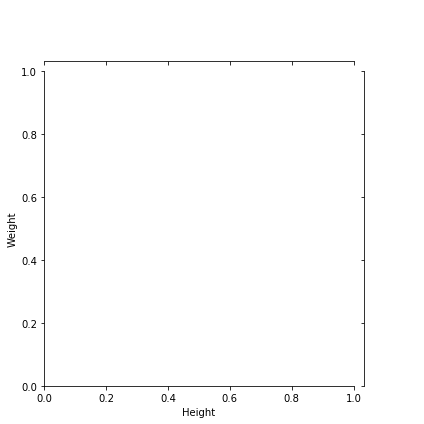

In [10]:
import numpy as np
import pandas as pd
import seaborn
import matplotlib.pyplot as plt

df_hw_biased=pd.read_csv('dataset/500_Person_Gender_Height_Weight_Index.csv')
print(df_hw_biased.describe())
print('\n',df_hw_biased.head())

hw_plot=seaborn.jointplot(data=df_hw_biased, x='Height', y='Weight', kind='reg', color='k')
#hw_plot.savefig("Fig_height_weight_biased.png")

AttributeError: module 'numpy' has no attribute 'histogram_bin_edges'

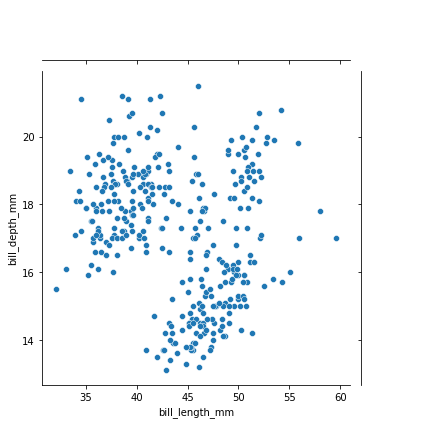

In [12]:
penguins = sns.load_dataset("penguins")
sns.jointplot(data=penguins, x="bill_length_mm", y="bill_depth_mm")

In [ ]:
penguins.describe()